In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from imblearn.over_sampling import ADASYN

% matplotlib inline

In [17]:
# Load data
train_df = pd.read_csv("~/real_estate/data/v5/final/yelp/yelp_train_df.csv")
train_df = train_df.loc[train_df["target"] != -5]

smote_features = train_df.columns[:-1]

In [21]:
scaled_target = (train_df["target"].values - min(train_df["target"]))/(
    max(train_df["target"]) - min(train_df["target"]))

target_groups = []

for i in scaled_target:
    target = int(np.floor(i*30))
    target_groups.append(target)

In [23]:
indices_first = [i for i, x in enumerate(target_groups) if x in [0,1]]
indices_last = [i for i, x in enumerate(target_groups) if x in [27,28,29,30]]

for i in indices_first:
    target_groups[i] = 2
for i in indices_last:
    target_groups[i] = 26

In [24]:
adasyn = ADASYN(n_neighbors=5, ratio="minority", random_state=42)
X_res, y_res = adasyn.fit_resample(train_df[smote_features].values, target_groups)

for i in range(21):
    X_res, y_res = adasyn.fit_resample(X_res, y_res)
    
X_res = pd.DataFrame(X_res, columns=smote_features)

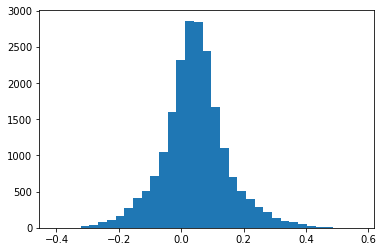

In [25]:
plt.hist(train_df["target"], bins=35)
plt.show()

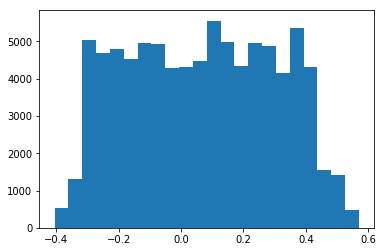

In [26]:
plt.hist(X_res["target"], bins=22)
plt.show()

In [27]:
X_res.to_csv("~/real_estate/data/v5/final/yelp/yelp_train_df_adasyn.csv", index=False)